### CS484/684 Computational Vision

# Homework Assignment 0

This assignment is a teaser/refresher on calculus, linear algebra, and includes exercises on lenses, image gradients, point processing, and harris corners. It also introduces you to jupiter notebook enviroment and python. Notebook environment allows you to combine cells with python code and cells with text (markdown cells). Text cells can include "latex" mathematical formulas. Such formulas can be written in the inline mode, for example, $(x+y)^2=x^2+2xy+y^2$. Important or longer formulas may look better in a show mode, e.g. $$1=\sum_{n=1}^{\infty}\left(\frac{1}{2}\right)^n.$$ 
Latex is commonly used for scientific writing and you should use it for the written parts of your assignments. You should use text cells (markdown cells) to answer written questions or to present your explanations/comments in notebook reports with code. A list of common mathematical symbols in latex can be easily found online (e.g. https://oeis.org/wiki/List_of_LaTeX_mathematical_symbols). You can also find many online resources explaining latex for matematical equations, e.g. https://en.wikibooks.org/wiki/LaTeX/Advanced_Mathematics.

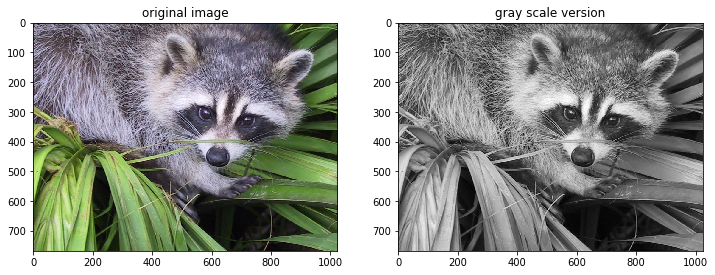

In [1]:
# This cell loads some libraries and a test image you can use. Feel free to load your own images
# but you must save them in "images" subdirectory before creating .zip for your submission.

%matplotlib inline
                     # NOTE: all "magic" options for backend plotting are: inline, notebook, and "external" (default) 
                     # see  http://ipython.readthedocs.io/en/stable/interactive/plotting.html for details
import numpy as np
import matplotlib
import matplotlib.image as image
import matplotlib.pyplot as plt
from scipy import misc
from skimage.color import rgb2gray

im = misc.face()     # a sample image in misc library
#im=image.imread("../images/IMG_3306.jpg") # another image (loaded from your file), uncomment one 

plt.figure(1,figsize = (12, 8))
plt.subplot(121)
plt.imshow(im)
plt.title("original image")
plt.subplot(122)
plt.imshow(rgb2gray(im),cmap="gray")
plt.title("gray scale version")
plt.show()

# Problem 1

#####  Use the following three cells to write your own python functions that take an arbitrary RGB image and outputs its greyscale version. The functions' input should be an RGB image. The computed greyscale image should be a 2D array of the same size as the input image. You should write your own code for converting colored images to greyscale images without using any standard functions like $rgb2gray$ from "skimage" in the cell above, or any other image library for python.  Treat greyscale value as an $average$ of the corresponding R G and B values. You should write three versions A, B, and C, as detailed in each cell below. 

In [2]:
# Solution A: (for-loops)
# In this version you should explicitly use two nested for-loops traversing individual pixels 
# of the input image, computing the average of R, G, and B values for each pixel, and copying them
# to the corresponding element of the output matrix (gray-scale image).
def toGrayScale_A(color_image):
    new = []
    for row in color_image:
        new_row = []
        for cell in row:
            R,G,B = cell
            new_row.append(0.2989 * R + 0.5870 * G + 0.1140 * B)
        new.append(new_row)
    return new


In [3]:
# Solution B: (basic numpy operators for matrix operations)
# In the next two versions you can't use for-loops (or other loops) explicitly traversing pixels. 
# In B below you should first separate image colors into individual 2D arrays (matrices) R,G and B 
# using "slicing" or "reshaping" (e.g. see Filtering.ipynb in Code/Samples - course web page) 
# and then compute the average of these matrices 0.3333*(A+B+C) directly using numpy operators + and * 
# for adding and scaling matrices. HINT: your code can look like linear algebraic expresion above.
def toGrayScale_B(im):
    R = np.reshape(im[:,:,0],im.shape[0]*im.shape[1])
    G = np.reshape(im[:,:,1],im.shape[0]*im.shape[1])
    B = np.reshape(im[:,:,2],im.shape[0]*im.shape[1])
    return np.reshape(0.33 * R + 0.33 * G + 0.33 * B, (im.shape[0], im.shape[1]))


In [4]:
# Solution C: (vectorized functions)
# In this version you should use numpy function 'dot' applying it 
# directly to colored image (3d array) and vector [0.33,0.33,0.33] defining weights 
# for each color component. 
def toGrayScale_C(color_image):
    return np.dot(color_image, [0.33,0.33,0.33])


In [5]:
%%time
# Test your code for version A in this cell.
plt.figure(2,figsize = (12, 8))
plt.subplot(121)
plt.imshow(im)
plt.title("original image")
plt.subplot(122)
plt.imshow(toGrayScale_A(im),cmap="gray")
plt.title("gray scale version")
plt.show()

CPU times: user 5.26 s, sys: 25.5 ms, total: 5.28 s
Wall time: 5.29 s


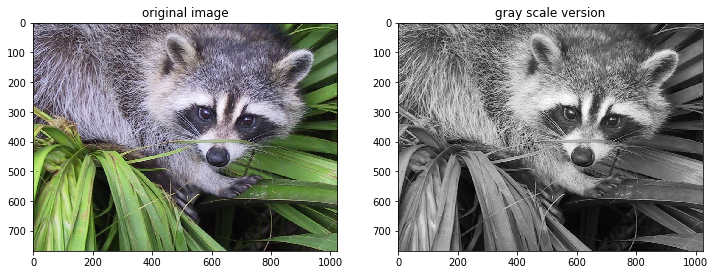

CPU times: user 331 ms, sys: 17 ms, total: 348 ms
Wall time: 347 ms


In [6]:
%%time
# Test your code for version B in this cell.
plt.figure(3,figsize = (12, 8))
plt.subplot(121)
plt.imshow(im)
plt.title("original image")
plt.subplot(122)
plt.imshow(toGrayScale_B(im),cmap="gray")
plt.title("gray scale version")
plt.show()

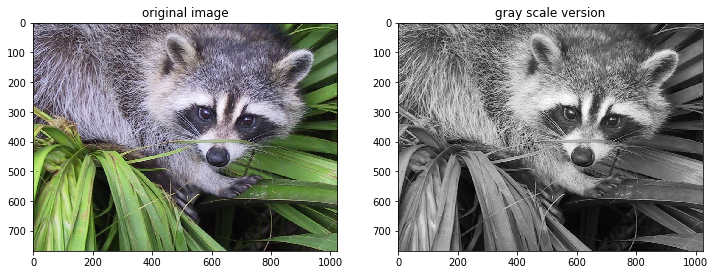

CPU times: user 319 ms, sys: 12.2 ms, total: 331 ms
Wall time: 329 ms


In [7]:
%%time
plt.figure(4,figsize = (12, 8))
plt.subplot(121)
plt.imshow(im)
plt.title("original image")
plt.subplot(122)
plt.imshow(toGrayScale_C(im),cmap="gray")
plt.title("gray scale version")
plt.show()

##  ATTENTION: problem 1 should teach you NEVER to use for-loops (or any other loops) when working with images or matrices! <font color=red> Later in this course, your marks will be significantly reduced if your code explicitly traverses matrix elements. </font> You should always use basic 'numpy' operators for matrices that make your code both efficient and simple. In many cases they will make your code look exactly like linear algebraic equations. When basic linear algebraic operators are not enough, you should look for appropriate "vectorized" functions (e.g. like 'dot'). We will often provide hints for what vectorized functions you can use. Learning how to use vectorized functions is significant for properly coding in 'numpy'.

# Problem 2

##### Write code that randomly shuffles all image pixels using function numpy.random.shuffle. Show some test case (original image and result).

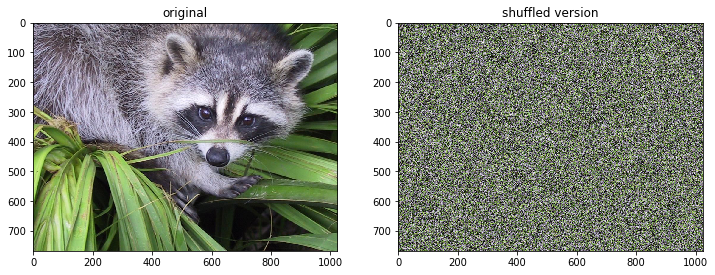

In [8]:
# Solution: write your code in this cell. Show one image and a result of shuffling. 
reshaped = np.reshape(im, (im.shape[0] * im.shape[1], im.shape[2])).copy()
np.random.shuffle(reshaped)
rnd = np.reshape(reshaped, im.shape)

plt.figure(5,figsize = (12, 8))
plt.subplot(121)
plt.imshow(im)
plt.title("original")
plt.subplot(122)
plt.imshow(rnd)
plt.title("shuffled version")
plt.show()

# Problem 3

##### Define domain transformation functions $t_x(x,y)$ and $t_y(x,y)$ that reflects an image in the pixel $(x_c,y_c)$. You can assume real-valued precision.

My solution is $$\begin{eqnarray} t_x(x,y)&=& 2x_c - x \\ t_y(x,y)&=& 2y_c - y     \end{eqnarray}$$

Use only plain text (no boldface or ### heading) in your solutions so that it is easier to distinguish your work from the provided problem statements. However, if necessary, you can insert additional cells, if that helps the structure your solution. 

Do not change the order of the problems. Once you completed all written and code cells, run $$\text{Kernel->Restart & Run All}$$ to generate a final "gradable" version of your notebook and save your ipynb file. Also use $$\text{File->Print Preview}$$ and then print your report from your browser into a pdf file. Submit both .pdf and .ipynb files.

# Problem 4

##### As stated in the lectures (topic 2), assuming fixed "image distance" a lens generates perfectly sharp image only for 3D points at some particular depth. Assuming an object has sharp image when image distance is $h$ and that the focal length of the lens  $f$  is known, what is the object’s depth $$d(h) = ?$$ Your solution should show your derivation. HINT: Use the illustration below to find similar triangles and to identify where the focal length $f$ of the lens is relevant. <img src="images/fig for problem_4.png">

The similar triangles are formed between $A$ and $A'$, center of lens $c$ along the horizontal axis that passes through the cetner.
The similar triangles shows the following relation,

$$\frac{A}{A'} = \frac{d}{h}$$

Therefore,
$$d = \frac{Ah}{A'}$$

My solution is
$$d(h) = \frac{A}{A'}h$$


# Problem 5

##### (a) Find all points $x\in R^1$ corresponding to local minima for function $f(x) = 2x^3 + x^2 - x$. Show your derivation.

$$f'(x) = 6x^2 + 2x - 1$$

##### (b) Consider the following function of two variables $f(x,y) = yx^2 - xy^2+3y$ and find all points with zero gradient $\nabla f = 0$. HINT: you need to find all solutions $(x,y)\in R^2$ to the following system of equations $$\left\{\begin{align} \frac{\partial f}{\partial x} & =  0 \\  \frac{\partial f}{\partial y}  & =  0 \end{align}  \right.$$

The solutions are
$$\frac{\partial f}{\partial x} = 2xy - y^2 = 0$$
$$\frac{\partial f}{\partial y} = x^2 - 2xy + 3 = 0$$

$$x_1 = 1, y_1 = 2$$
$$x_2 = -1, y_2 = -2$$

My solution is
$$(1, 2, 4)$$
$$(-1, -2, -4)$$
for point $(x, y, z)$ in the 3d plane

##### (c) Use "matplotlib" to display a 3D plot for function f(x,y) over the domain $(x,y)\in[-4,4]\times [-3,3] $. Write your code in the cell below. Make sure you "run" the cell with your code below before saving and submitting your notebook. This will make your plot (the output of your code) visible when the notebook is opened for grading.

In [15]:
# Solution: write your code in this cell
%matplotlib notebook
# NOTE: unlike "inline" mode activated in earlier cells, "notebook" allows interactive plots

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def f(x, y):
    return y*x**2 - x*y**2 + 3*y

x = np.linspace(-4, 4, 30)
y = np.linspace(-3, 3, 30)
x, y = np.meshgrid(x, y)
z = f(x,y)
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(x,y,z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


<IPython.core.display.Javascript object>

##### (d) Visualize vector field of gradients for $f(x,y)$ over the same domain $-4<x<4, -3<y<3 $. See one of the posted demo notebooks for inspiration.

In [16]:
# Solution: write your code in this cell
from scipy import ndimage, signal

plot = plt.figure(figsize = (10,6),facecolor = '0.7')

dx = (1/2.)*np.array([[ 0.0, 0.0, 0.0],
                      [ 1.0, 0.0,-1.0],
                      [ 0.0, 0.0, 0.0]])

dy = (1/2.)*np.array([[ 0.0,-1.0, 0.0],
                      [ 0.0, 0.0, 0.0],
                      [ 0.0, 1.0, 0.0]])
x = np.linspace(-4, 4, 400)
y = np.linspace(-3, 3, 300)
x, y = np.meshgrid(x, y)
z = f(x,y)

im_dx = signal.convolve2d(z, dx, boundary='symm', mode='same')
im_dy = signal.convolve2d(z, dy, boundary='symm', mode='same')
grad = np.sqrt(im_dx**2 + im_dy**2)
y, x = np.mgrid[0:im_dx.shape[0],0:im_dx.shape[1]] 

s = 25   # one vector per box of size s*s
plt.quiver(x[::s,::s], y[::s,::s], im_dx[::s, ::s], im_dy[::s, ::s], 
           grad[::s,::s], cmap=cm.seismic, 
           # color = 'b',   # to display vectors in blue only, uncomment this and comment the line above, 
           width = 0.003)
plt.colorbar()                  
plt.imshow(z)
plt.show() 

<IPython.core.display.Javascript object>

# Problem 6

##### Prove that median filtering in not a linear image transormation. HINT: find a counter example showing that for some vectors of the same dimensions $A$ and $B$, $$Med(A + B)\neq Med(A) + Med(B)$$  where operation $Med(X)$ returns median of the elements of vector $X$.

Let A be an array of numbers $[1, 2, 3]$
Let B be an array of numbers $[0, -2, 3]$

Then,

$$Med(A) = 2$$
$$Med(B) = -2$$
$$Med(A + B) = Med([1, 0, 6]) = 1$$

We can see that,
$$Med(A + B)\neq Med(A) + Med(B)$$

# Problem 7

##### (a) Image differentiation: Write code for a python function that estimates partial derivatives $d(x,y):=\frac{\partial}{\partial y} f(x,y)$ of any greyscale image $f$ with respect to variable $y$. The function should return a real-valued matrix of the same size as the input image $f$. Use central difference approximation $$\frac{\partial}{\partial y} f(x,y)\approx \frac{f(x,y+\Delta)-f(x,y-\Delta)}{2\Delta}$$ where $\Delta$ is the distance between pixels (use $\Delta=1$). You are not allowed to use colvolution (as in the sample notebook "convolution.ipynb"). <font color=red> GENERAL NOTE ON NUMPY: while woirking with matrices in numpy, one should stay away from using double for-loops for traversing the elsements. This is highly inefficient and numpy has many functions to avoid this that you will eventually learn. </font> For example, for this excercise you can use numpy.roll to compute image with pixels shifted to the left or right and use linear operations over images as matrices (pointwise addition/subtraction).

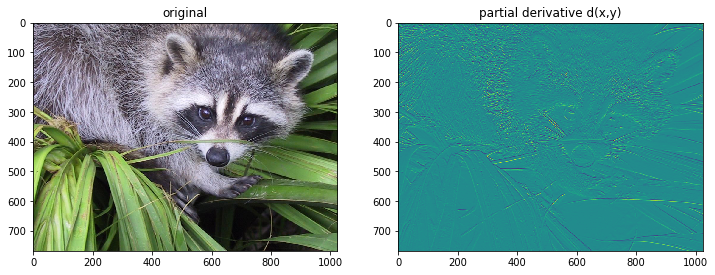

In [11]:
%matplotlib inline

def ypd(f):
    up = np.roll(f, 1, axis=0)
    down = np.roll(f, -1, axis=0)
    return (up - down)/2

gray = toGrayScale_C(im)
plt.figure(figsize = (12, 8))
plt.subplot(121)
plt.imshow(im)
plt.title("original")
plt.subplot(122)
plt.imshow(ypd(gray))
plt.title("partial derivative d(x,y)")
plt.show()

##### (b) Point processing: find linear range transofrmation function $t(d)$ that $rescales$ partial derivatives $d=\frac{\partial}{\partial y} f$ computed above to values in the range $[0,255]$ so that $t(d_{max})=255$ for the maximum observed value of partial derivative $d_{max}$ and $t(d_{min})=0$ for the minimum derivative $d_{min}$. Compute the transformed grayscale image $g(x,y) = t(d(x,y))$ and display both $f$ and $g$. As input $f$ you can use any grayscale image.

In [12]:
def t(d):
    diff = d.max() - d.min()
    return (d - d.min()) * 255 / diff

plt.figure(figsize = (12, 8))
plt.subplot(121)
plt.imshow(im)
plt.title("original")
plt.subplot(122)
plt.imshow(t(ypd(gray)))
plt.title("transformed gray t(d(x,y))")
plt.show()

##### (c) Write code demonstrating partial derivatives for the same image with substantial amount of added Gaussian noise (you can use code for noise generation from Filtering.ipynb).

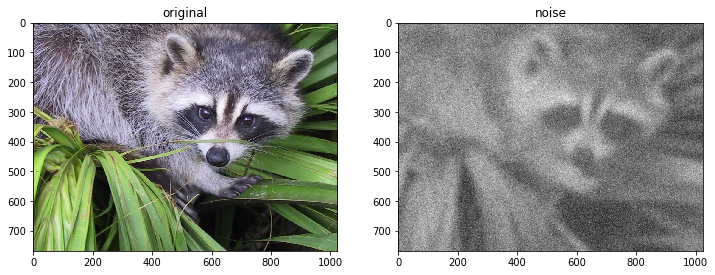

In [19]:
%matplotlib inline

from scipy import ndimage

# generating image with gaussian noise
imR = im[:,:,0] 

test = ndimage.gaussian_filter(imR, sigma=8)
blurred = ndimage.gaussian_filter(test, sigma=3)

sigma = 30.0
gauss = np.random.normal(0.0,sigma,(imR.shape[0],imR.shape[1]))  # Gaussian noise array of given shape
gauss_im = blurred + gauss         # additive Gaussian/Normal noise

# generating image with salt-&-pepper noise (only pepper part) 
pool = [0.0,1.0]     # pool of numbers for sampling
prob = [0.2,0.8] # probabilities of these numbers
pepper = np.random.choice(pool,(imR.shape[0],imR.shape[1]), p = prob)  # Bernoulli noise (as array)
pepper_im = blurred * pepper   # value 1 in pepper keeps intensity in "blurred", 0 reduces it to zero

plt.figure(figsize = (12, 8))
plt.subplot(121)
plt.imshow(im)
plt.title("original")
plt.subplot(122)
plt.imshow(gauss_im,cmap="gray")
plt.title("noise")
plt.show()

# Problem 8

##### (a) In this problem we use $\nabla I (x,y)$ to denote a gradient of image inensities at point $(x,y)$ only to emphasize this dependence of the gradient on location. Assume that $\nabla I (x,y)$  is a non-zero vector at a given point $(x,y)$. What is the rank of matrix $\nabla I(x,y) \cdot \nabla I^T(x,y)$ and why?

Solution: Suppse $\nabla I(x,y)$ is

$$
\left[
  \begin{array}{c}
  I_x \\
  I_y \\
  \end{array}
\right]
$$

Then $\nabla I(x,y) \cdot \nabla I^T(x,y)$ is

$$
\left[
  \begin{array}{cc}
  I_x^2 & I_xI_y\\
  I_yI_x & I_y^2 \\
  \end{array}
\right]
$$

The determinant is $I_x^2I_y^2 - I_xI_yI_yI_x = 0$
Because the matrix is non-empty, it cannot have rank 0. Also because a matrix is full rank only when its determinant is non-zero, it cannot have rank 2. Therefore, it has rank 1.

##### (b) Assume that an image patch (window $w$) contains a straight intensity edge (as in window $W_b$ below). What should be the rank of Harris matrix  at that patch/window $M_w = \sum_{(x,y)\in w} \nabla I(x,y) \cdot \nabla I^T(x,y)$ and why? 

NOTE: here we assume that $w$ stands for a subset of pixels in the window, rather than 0-1 indicator function for this window (as in the lecture notes). Both types of notation is common. While 0-1 indicators $w(x,y)$ easily extend to weighted support functions, we do not need this generality for this excercise and preferred a slightly simpler set notation. <img src="images/fig for problem_8.png">

Solution: The rank of the Harris matrix of $W_b$ should still be 1. This is because only on an edge, the pixels will have non-zero gradients, and on the flat areas the matrix will be all zeros. Because the pixels are on the same edge in $W_b$, they have the same $I_x$ and $I_y$ and will produce the same resulting matrix, which has determinant 0 as shown in a). Therefore, in the Harris matrix of $W_b$ there are a multiple of $\nabla I(x,y) \cdot \nabla I^T(x,y)$ matrices, so the rank is still 1.

##### (c) What is the rank of Harris matrix at a patch/window containing a corner at an intersection of two straight edges  (as in $W_c$ above)? Provide a formal proof.

Solution:  